
<br>
<p style="text-align: left;"><img src='https://s3.amazonaws.com/weclouddata/images/logos/sunlife_logo.png' width='35%'></p>
<p style="text-align:left;"><font size='10'><b> Machine Learning - Classification & Decision Boundaries</b></font> </p><br> <font color='#559E54' size=6>Instructor Copy</font> </p>
<h2 align='left' > Sunlife Data Science Training </h2>

<h4 align='left'>  Prepared by: <img src='https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png' width='15%'>

---


In [1]:
# import libraries
from sklearn import linear_model, datasets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

# set visualization styles
%matplotlib inline
sns.set(style='ticks', palette='Set2')

/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# <font color='#347B98'> 1. Understanding Decision Boundaries
    
While learning or doing machine learning, one always find it useful to explain the internals of an algorithm. However, simply explaining how they work algorithmically rarely gives one a satisfying feeling of intuition. To aid understand how a particular algorithm works, especially when one technique works better than another, `visualizing the decision boundaries of different algorithms on the same data problem will be extremely intuitive`. Given a supervised learning problem where there are points of two classes, we can train machine learning techniques to predict which class a hypothetical point should belong to.


** Wikipedia Definition **
> In a statistical-classification problem with two classes, a `decision boundary` or `decision surface` is a hypersurface that partitions the underlying vector space into two sets, one for each class. The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class.  

> - **<font color='#D61A46'> A decision boundary is the region of a problem space in which the output label of a classifier is ambiguous</font>**.  

> - If the decision surface is a hyperplane, then the classification problem is linear, and the classes are linearly separable.  

> - <font color='#D61A46'> Decision boundaries are not always clear cut.</font> That is, the transition from one class in the feature space to another is not discontinuous, but gradual. This effect is common in fuzzy logic based classification algorithms, where membership in one class or another is ambiguous.

<img src='https://s3.amazonaws.com/weclouddata/images/python/ml_decision_boundaries.png' width='40%'>

## $\Delta$ 1.1 - Generate dataset

In [2]:
X, y = make_blobs(n_samples=1000,
                  centers=[[0.1, 0.1],[0.9, 0.9]],
                  cluster_std=0.15,
                  n_features=2,
                  random_state=0)

print ('Vectors: \n', X[:10])
print ('Labels: \n', y[:10])

Vectors: 
 [[-0.05728294 -0.11300269]
 [ 0.36460785  0.16002358]
 [ 0.82563068  1.08248666]
 [ 0.41751865 -0.14163176]
 [ 0.79036896  0.65374452]
 [ 1.03821126  0.96912217]
 [ 0.43889634  0.09366143]
 [-0.23594061  0.16022486]
 [ 0.45080807  1.03214063]
 [ 0.8807637   0.85923427]]
Labels: 
 [0 0 1 0 1 1 0 0 1 1]


## $\Delta$ 1.2 - Write a function to plot data

In [3]:
def plot_data(X, y, title=None):
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.PRGn, alpha=0.3)
    #plt.plot([-0.5, 1.5], [1.5, -0.5], alpha=0.6, lw=3)
    plt.xlabel('X1', fontsize=12)
    plt.ylabel('X2', fontsize=12)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.title('{}'.format(title), fontsize=14)
    plt.show()

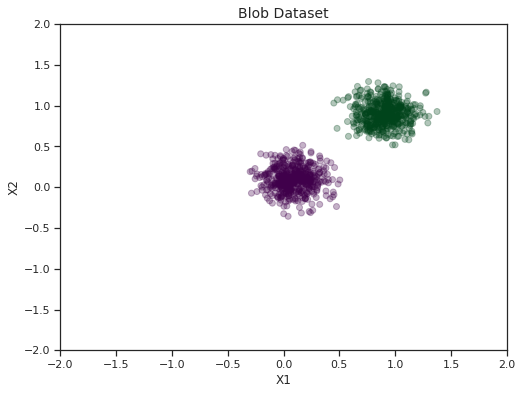

In [4]:
plot_data(X, y, title='Blob Dataset')

## $\Delta$ 1.3 - Write a function to plot decision boundary

The `plot_decision_boundary` function takes a trained ML model, feature dataset (X), and target dataset (y) as parameters. It uses the trained model to create predictions for all data points generated from a meshgrid, then uses the contour plot to visualize the decision boundary. 

> This `plot_decision_boundary` function will be called many times in this tutorial, so let's create a function

In [5]:
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots(figsize=(8,6))
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.PRGn, alpha=0.5)
    ax.scatter(X[:,0], X[:,1], c=y, alpha=0.7)

> To customize colormap, refer to   
> - https://matplotlib.org/examples/color/colormaps_reference.html

## $\Delta$ 1.3 - Linear Decision Boundaries - <font color='#FC7307'>Separable</font>

Use your knowledge of scikit-learn to define a Logistic Regression model that separates the two classes and plot its decision boundary using the function below.

### <font color='#FC7307'> 1.3.1 - Generate Dataset </font>

Vectors: 
 [[-0.05728294 -0.11300269]
 [ 0.36460785  0.16002358]
 [ 0.82563068  1.08248666]
 [ 0.41751865 -0.14163176]
 [ 0.79036896  0.65374452]
 [ 1.03821126  0.96912217]
 [ 0.43889634  0.09366143]
 [-0.23594061  0.16022486]
 [ 0.45080807  1.03214063]
 [ 0.8807637   0.85923427]]
Labels: 
 [0 0 1 0 1 1 0 0 1 1]


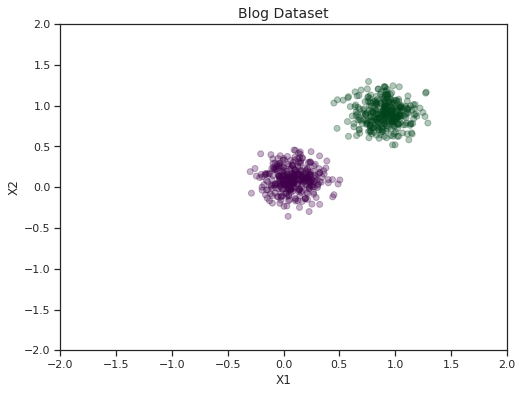

In [6]:
X, y = make_blobs(n_samples=1000,
                  centers=[[0.1, 0.1],[0.9, 0.9]],
                  cluster_std=0.15,
                  n_features=2,
                  random_state=0)

print ('Vectors: \n', X[:10])
print ('Labels: \n', y[:10])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plot_data(X_train, y_train, title='Blog Dataset')

### <font color='#FC7307'> 1.3.2 - Fit a LR Model </font>

In [7]:
lr_1 = linear_model.LogisticRegression(C=1e5)
model = lr_1.fit(X_train, y_train)

/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### <font color='#FC7307'> 1.3.3 - Plot Decision Boundary </font>

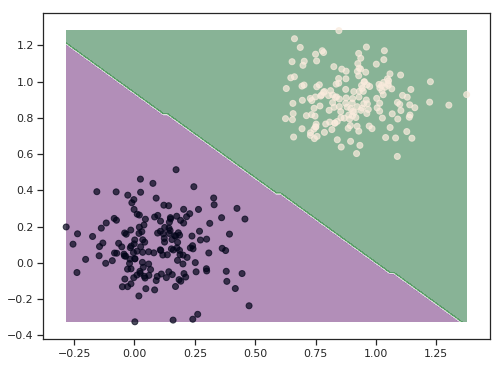

In [8]:
plot_decision_boundary(lr_1, X_test, y_test)

## $\Delta$ 1.4 - Linear Decision Boundary - <font color='#559E54'> Non-separable </font>

> `Logistic Regression` (the LR algorithm will be introduced later in a separate tutorial) is a linear model. Let's see how it handles **non-linear data**

### <font color='#559E54'> 1.4.1 - Generate Dataset - Add more noise </font>

Vectors: 
 [[-0.21456589 -0.32600538]
 [ 0.6292157   0.22004716]
 [ 0.75126135  1.26497331]
 [ 0.73503731 -0.38326352]
 [ 0.68073792  0.40748903]
 [ 1.17642252  1.03824434]
 [ 0.77779269  0.08732285]
 [-0.57188122  0.22044972]
 [ 0.00161614  1.16428127]
 [ 0.86152741  0.81846853]]
Labels: 
 [0 0 1 0 1 1 0 0 1 1]


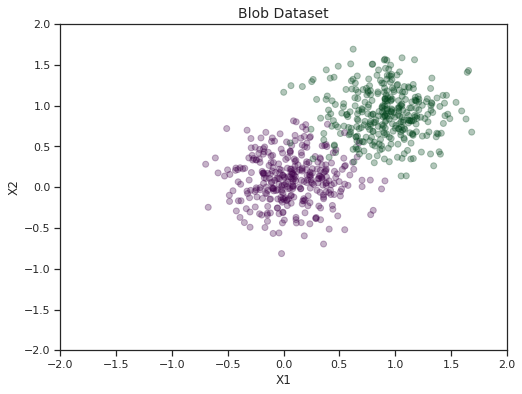

In [9]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000,
                  centers=[[0.1, 0.1],[0.9, 0.9]],
                  cluster_std=0.3, # bigger std
                  n_features=2,
                  random_state=0)

print ('Vectors: \n', X[:10])
print ('Labels: \n', y[:10])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plot_data(X_train, y_train, title='Blob Dataset')

### <font color='#559E54'> 1.4.2 - Fit a LR Model </font>

In [10]:
lr_2 = linear_model.LogisticRegression(C=1e5)
model = lr_2.fit(X_train, y_train)

/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### <font color='#559E54'> 1.4.3 - Plot Decision Boundary </font>

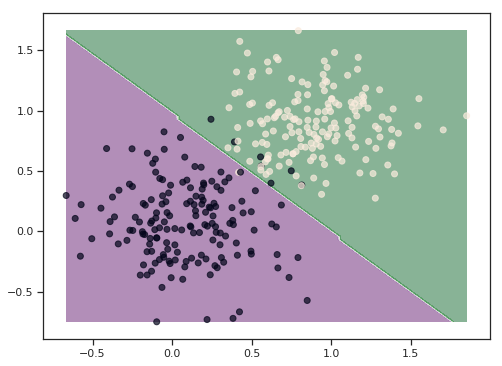

In [11]:
plot_decision_boundary(lr_2, X_test, y_test)

> We notice that a linear decision boundary will cause misclassified data points. Let's try to introduce the `polynomial terms` and see if that help improve the separation

### 1.4.4 - Introducing Polynomials Terms 

> HINT: `sklearn.preprocessing.PolynomialFeatures`

In [12]:
poly = PolynomialFeatures(degree=3)
poly

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [13]:
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [14]:
print('X_train shape: {}'.format(X_train_poly.shape))
print('X_test shape: {}'.format(X_test_poly.shape))

X_train shape: (670, 10)
X_test shape: (330, 10)


### 1.4.5 - Fit models with polynomial features

In [15]:
lr_3 = linear_model.LogisticRegression(C=1e5)
model = lr_3.fit(X_train_poly, y_train)

/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 1.4.6 - Plot decision boundaries

> <font color='#D61A46'> By introducing the polynomial terms, we add more features to the training dataset, thus we need to modify the plotting functions slightly.

In [16]:
def plot_decision_boundary_poly(model, X, y, polyfit):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    xxyy = np.c_[xx.ravel(), yy.ravel()]
    xxyy_poly = polyfit.transform(xxyy)
    ZZ = model.predict(xxyy_poly)
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots(figsize=(8,6))
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.PRGn, alpha=0.5)
    ax.scatter(X[:,0], X[:,1], c=y, alpha=0.7)

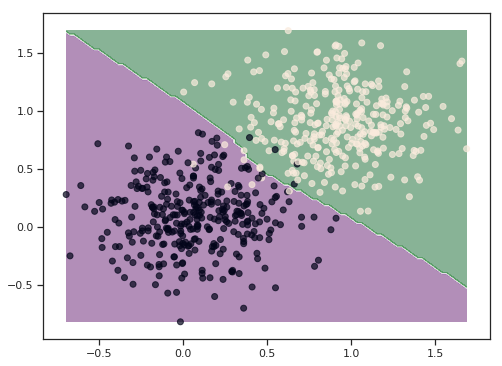

In [17]:
plot_decision_boundary_poly(lr_3, X_train, y_train, poly)

> <font color='#D61A46'> We notice slight improvement in the classification and the decsion boundary is bended slightly close to the region where `1s` and `0s` are hard to separate.

---
# <font color='#347B98'> 2. Non-Linear Decision Boundaries


Now let's make things a little harder...

In real life data problems, there's hardly a clear-cut in decision boundaries. And many data is highly non-linear and nonseparable. In this tutorial, we're going to introduce the circle and moons datasets to help understand the non-linear decision boundaries. 

**Exercise**
1. Create the circles dataset using `sklearn.datasets.make_circles`
2. Try to fit a Logistic regression model to separate the data and plot the decision boundary
  - Is the score good or bad? Does the decision boundary correctly separate the data?
3. Try to add polynomial terms and see if that help improve the logistic regression model

## $\Delta$ 2.1 - Generate `circles` dataset

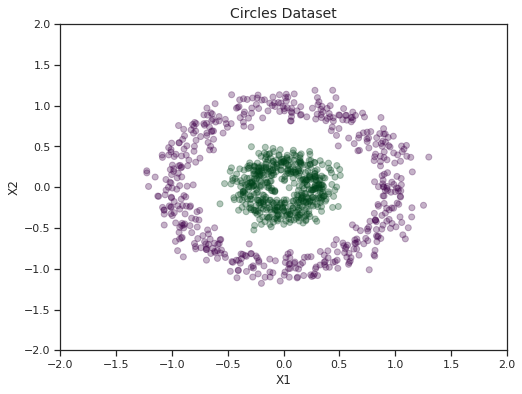

In [18]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.3,
                    random_state=0)

plot_data(X, y, title='Circles Dataset')

## $\Delta$ 2.2 - Fit Logistic Regression Model

In [19]:
#############################
# Your Code Below
#############################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr_4 = linear_model.LogisticRegression(C=1e5)
lr_4 = lr_4.fit(X_train, y_train)
print ("Model: ", lr_4)
print ("Coefficient: ", lr_4.coef_)
print ("Intercept: ", lr_4.intercept_)
print ("Number of iterations: ", lr_4.n_iter_)

/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model:  LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
Coefficient:  [[0.12707012 0.02200679]]
Intercept:  [-0.06774022]
Number of iterations:  [3]


In [20]:
cv_score = np.mean(cross_val_score(lr_4, X_train, y_train, cv=5))
print("Cross Validation Scores: {}".format(cv_score))

Cross Validation Scores: 0.38965731077278604


/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

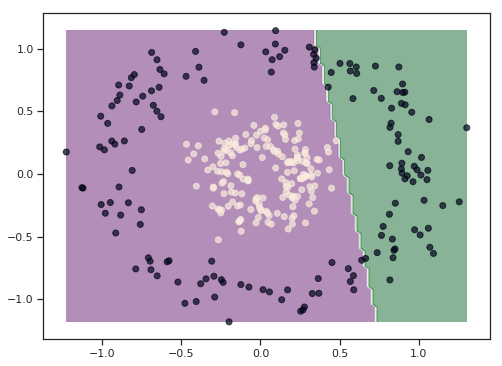

In [21]:
plot_decision_boundary(lr_4, X_test, y_test)

## $\Delta$ 2.2 - Add Polynomial Terms

### 2.2.1 - Add Polynomial Features 

In [22]:
#############################
# Your Code Below
#############################

poly_2 = PolynomialFeatures(degree=3)
poly_2.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

### 2.2.2 - Fit Logistic

In [23]:
#############################
# Your Code Below
#############################

lr_5 = linear_model.LogisticRegression(C=1e5)
lr_5 = lr_5.fit(X_train_poly, y_train)

cv_score_poly = np.mean(cross_val_score(lr_4, X_test_poly, y_test, cv=5))
print("Cross Validation Scores: {}".format(cv_score_poly))

Cross Validation Scores: 1.0


/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

> <font color='#D61A46'> Note that cross validation score has increased from 0.65 to 1.0 after introducing the polynomial terms

### 2.2.3 - Plot Decision Boundary

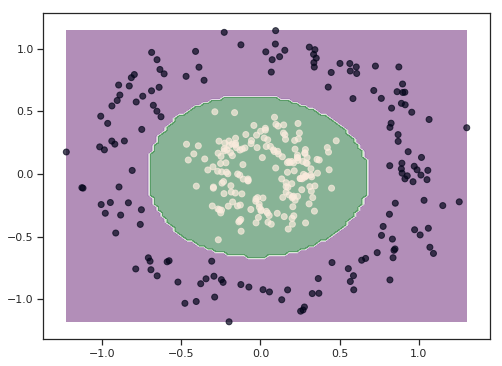

In [24]:
#############################
# Your Code Below
#############################

plot_decision_boundary_poly(lr_5, X_test, y_test, poly_2)

---
# <font color='#347B98'> 3. Decision Boundaries of Non-linear Models


In machine learning, Logistic belongs to the linear model family. There're non-linear models such as KNN, Random Forest, SVM, as well as Neural Networks. In this tutorial, let's try to understand the decision boundaries of these nonlinear models. 

** Exercise **
- Try to fit a `KNN` model and plot the decision boundary
- Try to fit a `SVM` model and plot the decision boundary
- Try to fit a `Decision Tree` model and plot the decision boundary
- Try to fit a `Random Forest` model and plot the decision boundary

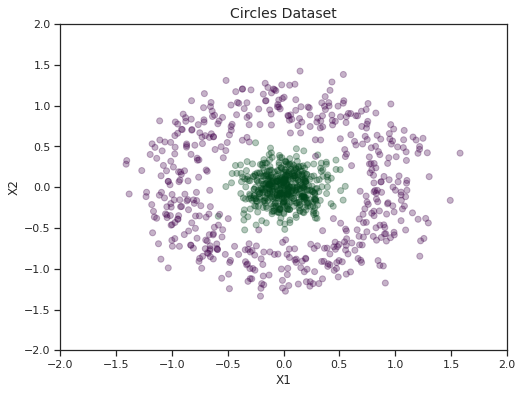

In [25]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    noise=0.18,
                    factor=0.1,
                    random_state=0)

plot_data(X, y, title='Circles Dataset')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

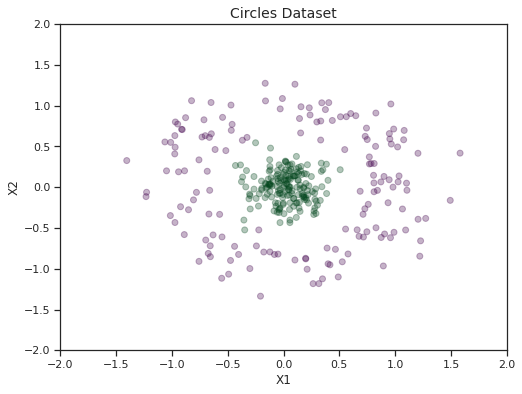

In [27]:
plot_data(X_test, y_test, title='Circles Dataset')

## $\Delta$ 3.1 - Fit a KNN model

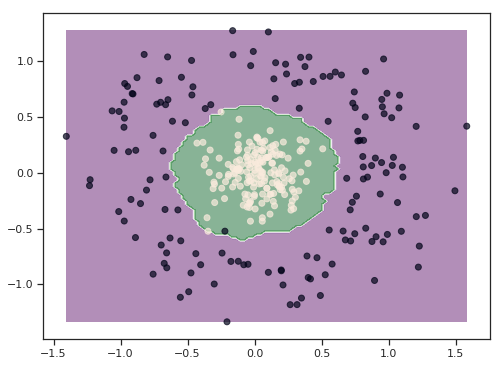

In [28]:
#############################
# Your Code Below
#############################

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

plot_decision_boundary(knn, X_test, y_test)

In [29]:
cv_score_knn = np.mean(cross_val_score(knn, X_train, y_train, cv=3))
print("Cross Validation Scores: {}".format(cv_score_knn))

Cross Validation Scores: 0.9969969969969971


## $\Delta$ 3.2 - Fit a SVM model

/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/folders/myfolders/.local/lib/python3.5/site-p

Cross Validation Scores: 0.9818181818181818


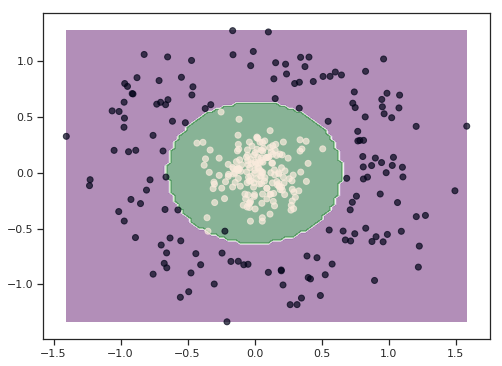

In [30]:
#############################
# Your Code Below
#############################

from sklearn.svm import SVC

svc = SVC(C=1.0, kernel='poly', degree=2)
svc.fit(X_train, y_train)

cv_score_svc = np.mean(cross_val_score(svc, X_test, y_test, cv=3))
print("Cross Validation Scores: {}".format(cv_score_svc))
plot_decision_boundary(svc, X_test, y_test)

## $\Delta$ 3.3 - Fit a Decision Tree model

/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Cross Validation Scores: 0.9666666666666667


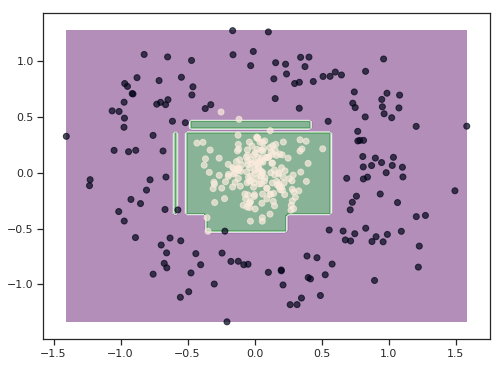

In [31]:
#############################
# Your Code Below
#############################

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)

cv_score_tree = np.mean(cross_val_score(tree, X_test, y_test, cv=3))
print("Cross Validation Scores: {}".format(cv_score_tree))
plot_decision_boundary(tree, X_test, y_test)

## $\Delta$ 3.4 - Fit a RandomForest model

/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Cross Validation Scores: 0.9757575757575759


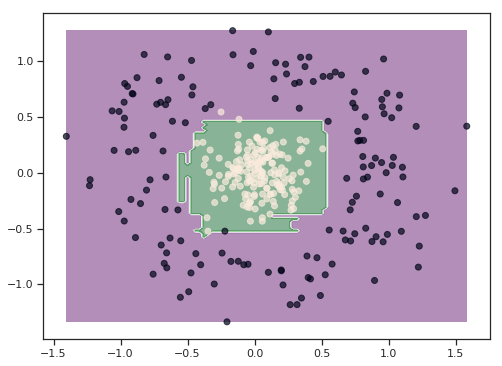

In [32]:
#############################
# Your Code Below
#############################

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=10)
rf.fit(X_train, y_train)

cv_score_rf = np.mean(cross_val_score(rf, X_test, y_test, cv=3))
print("Cross Validation Scores: {}".format(cv_score_rf))
plot_decision_boundary(rf, X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1500, max_depth=10)
rf.fit(X_train, y_train)

cv_score_rf = np.mean(cross_val_score(rf, X_test, y_test, cv=3))
print("Cross Validation Scores: {}".format(cv_score_rf))
plot_decision_boundary(rf, X_test, y_test)